In [1]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Data (preparing and loading)

In [2]:
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)

weight = 0.7
bias = 0.3

y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

### Split data into training and test sets

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8,5))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})
  plt.show()

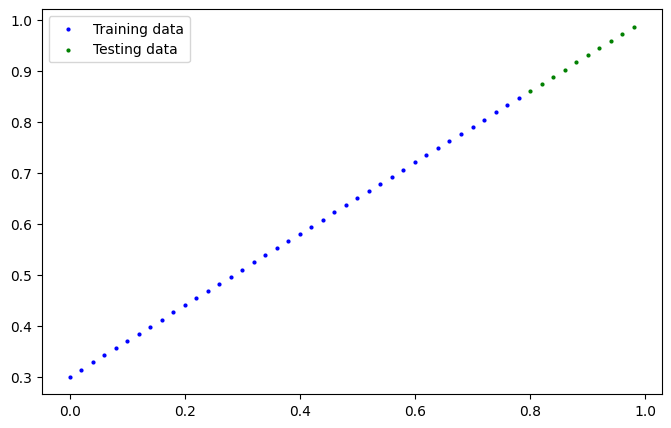

In [5]:
plot_predictions()

### Build a linear regression module

In [6]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [7]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# Make predictions with model
# torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference)
# to make forward-passes (data going through the forward() method) faster.
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

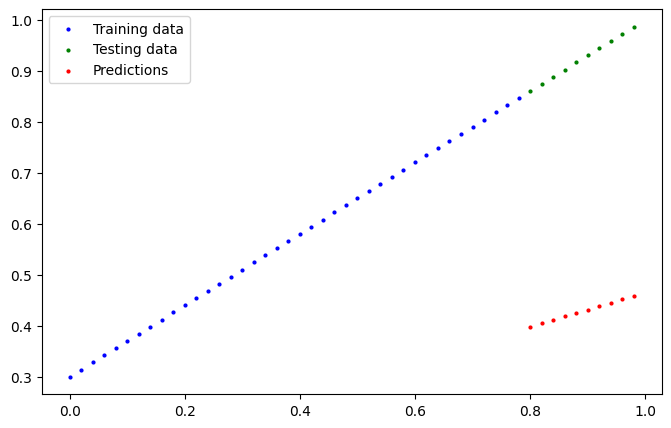

In [10]:
plot_predictions(predictions=y_preds)

### Train the model

In [11]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [12]:
torch.manual_seed(42)

epochs = 200
epoch_count = []
train_loss_val = []
test_loss_val = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  model.train()                       # Set the model to training mode
  y_pred = model(X_train)             # 1. Forward pass
  loss = loss_fn(y_pred, y_train)     # 2. Calculate the loss
  optimizer.zero_grad()               # 3. Clear out the gradients of all parameters that the optimizer is tracking
  loss.backward()                     # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  optimizer.step()                    # 5. Perform gradient descent

### Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)                 # 1. Forward pass on test data
    test_loss = loss_fn(test_pred, y_test)    # 2. Calculate the loss

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_val.append(loss.detach().numpy())
      test_loss_val.append(test_loss.detach().numpy())
      #(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      print(model.state_dict())


OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
OrderedDict([('weight', tensor([0.5288])), ('bias', tensor([0.3718]))])
OrderedDict([('weight', tensor([0.5459])), ('bias', tensor([0.3648]))])
OrderedDict([('weight', tensor([0.5629])), ('bias', tensor([0.3573]))])
OrderedDict([('weight', tensor([0.5800])), ('bias', tensor([0.3503]))])
OrderedDict([('weight', tensor([0.5972])), ('bias', tensor([0.3433]))])
OrderedDict([('weight', tensor([0.6141])), ('bias', tensor([0.3358]))])
OrderedDict([('weight', tensor([0.6313])), ('bias', tensor([0.32

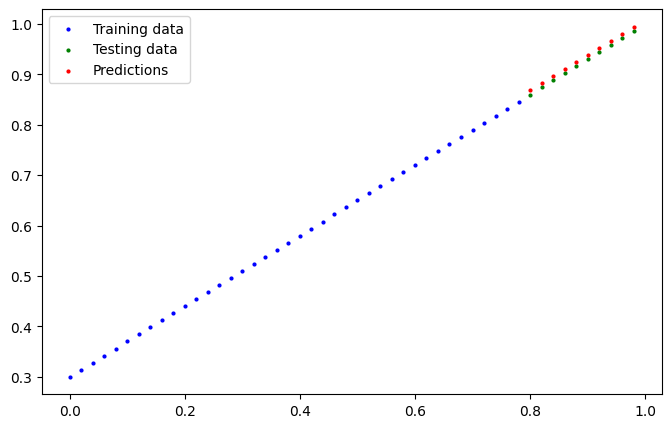

In [13]:
plot_predictions(predictions=test_pred)

In [14]:
train_loss_val

[array(0.31288138, dtype=float32),
 array(0.19767132, dtype=float32),
 array(0.08908726, dtype=float32),
 array(0.05314853, dtype=float32),
 array(0.04543797, dtype=float32),
 array(0.04167863, dtype=float32),
 array(0.03818933, dtype=float32),
 array(0.0347609, dtype=float32),
 array(0.03132383, dtype=float32),
 array(0.0278874, dtype=float32),
 array(0.02445896, dtype=float32),
 array(0.02102021, dtype=float32),
 array(0.01758547, dtype=float32),
 array(0.01415539, dtype=float32),
 array(0.01071659, dtype=float32),
 array(0.00728353, dtype=float32),
 array(0.00385178, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32)]

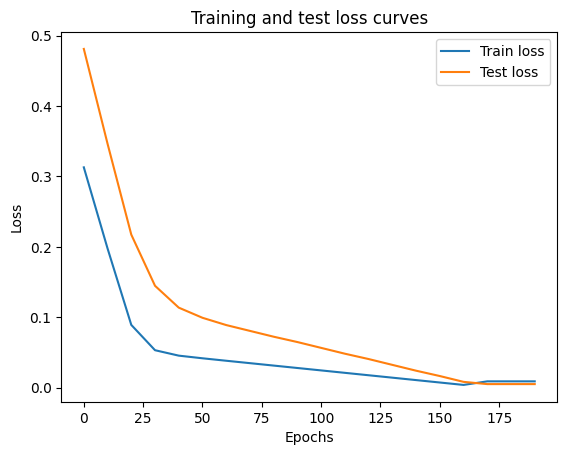

In [15]:
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
plt.show()

#Saving and loading model

In [16]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving to: models/01_pytorch_workflow_model.pth


In [17]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1668 Jun 26 06:50 01_pytorch_workflow_model.pth


In [18]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

In [20]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Build a linear regression module using nn.Linear


In [21]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [22]:
torch.manual_seed(42)
model_linear = LinearRegressionModelV2()
model_linear, model_linear.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [23]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_linear.parameters(), lr=0.01)

torch.manual_seed(42)
epochs = 200

### Training
for epoch in range(epochs):
  model_linear.train()
  y_pred = model_linear(X_train)      # 1. Forward pass
  loss = loss_fn(y_pred, y_train)     # 2. Calculate loss
  optimizer.zero_grad()               # 3. Zero grad
  loss.backward()                     # 4. Perform backpropagation
  optimizer.step()                    # 5. Optimizer step

  ### Testing
  model_linear.eval()
  with torch.inference_mode():
    test_pred = model_linear(X_test)
    test_loss = loss_fn(test_loss, y_test)

  if (epoch % 10 == 0):
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.9145522117614746
Epoch: 10 | Loss: 0.4161780774593353 | Test loss: 0.8691787719726562
Epoch: 20 | Loss: 0.27717819809913635 | Test loss: 0.863007664680481
Epoch: 30 | Loss: 0.13817831873893738 | Test loss: 0.8609855771064758
Epoch: 40 | Loss: 0.06483234465122223 | Test loss: 0.8603229522705078
Epoch: 50 | Loss: 0.06953977048397064 | Test loss: 0.8601056933403015
Epoch: 60 | Loss: 0.0556403286755085 | Test loss: 0.8600345849990845
Epoch: 70 | Loss: 0.0445832721889019 | Test loss: 0.8600112795829773
Epoch: 80 | Loss: 0.03573416918516159 | Test loss: 0.860003650188446
Epoch: 90 | Loss: 0.025599658489227295 | Test loss: 0.8600012063980103
Epoch: 100 | Loss: 0.015041215345263481 | Test loss: 0.8600004315376282
Epoch: 110 | Loss: 0.004283720161765814 | Test loss: 0.8600002527236938
Epoch: 120 | Loss: 0.0037691467441618443 | Test loss: 0.8600002527236938
Epoch: 130 | Loss: 0.0002783544478006661 | Test loss: 0.8600002527236938
Epoch: 140 | Los

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [24]:
model_linear.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6953]])),
             ('linear_layer.bias', tensor([0.3000]))])

In [25]:
# Making and evaluating predictions
model_linear.eval()
with torch.inference_mode():
  y_preds = model_linear(X_test)
y_preds

tensor([[0.8562],
        [0.8701],
        [0.8841],
        [0.8980],
        [0.9119],
        [0.9258],
        [0.9397],
        [0.9536],
        [0.9675],
        [0.9814]])

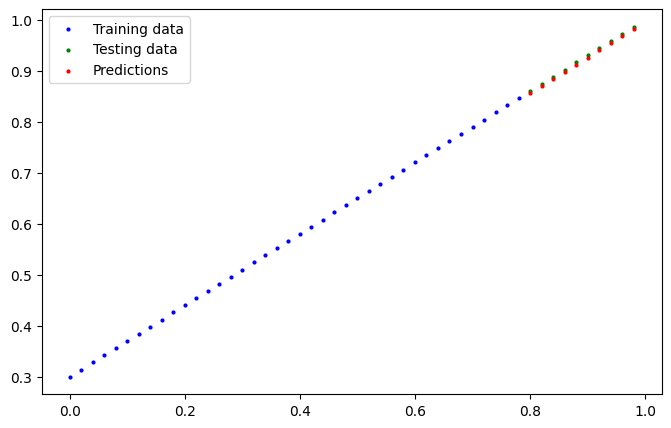

In [26]:
plot_predictions(predictions=y_preds)

In [27]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_linear.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_v2.pth


In [28]:
# Load the model
l_model_linear = LinearRegressionModelV2()
l_model_linear.load_state_dict(torch.load(MODEL_SAVE_PATH))

#l_model_linear.to(device)
l_model_linear, l_model_linear.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.6953]])),
              ('linear_layer.bias', tensor([0.3000]))]))

In [29]:
# Evaluate loded model
l_model_linear.eval()
with torch.inference_mode():
  l_model_linear_preds = l_model_linear(X_test)
y_preds  == l_model_linear_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Exercises

In [84]:
weight = 0.3
bias = 0.9

X = torch.arange(-1, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[-1.0000],
         [-0.9900],
         [-0.9800],
         [-0.9700],
         [-0.9600]]),
 tensor([[0.6000],
         [0.6030],
         [0.6060],
         [0.6090],
         [0.6120]]))

In [85]:
test_split_limit = int(len(X) * 0.8)
test_split_limit

160

In [86]:
X_train, y_train = X[:test_split_limit], y[:test_split_limit]
X_test, y_test = X[test_split_limit:], y[test_split_limit:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [109]:
def plot_data(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = None):

  plt.figure(figsize=(15,5))
  plt.scatter(train_data, train_labels, c="b", s=2, label="Train data")
  plt.scatter(test_data, test_labels, c="g", s=2, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=2, label="Predictions")
  plt.legend()
  plt.show()

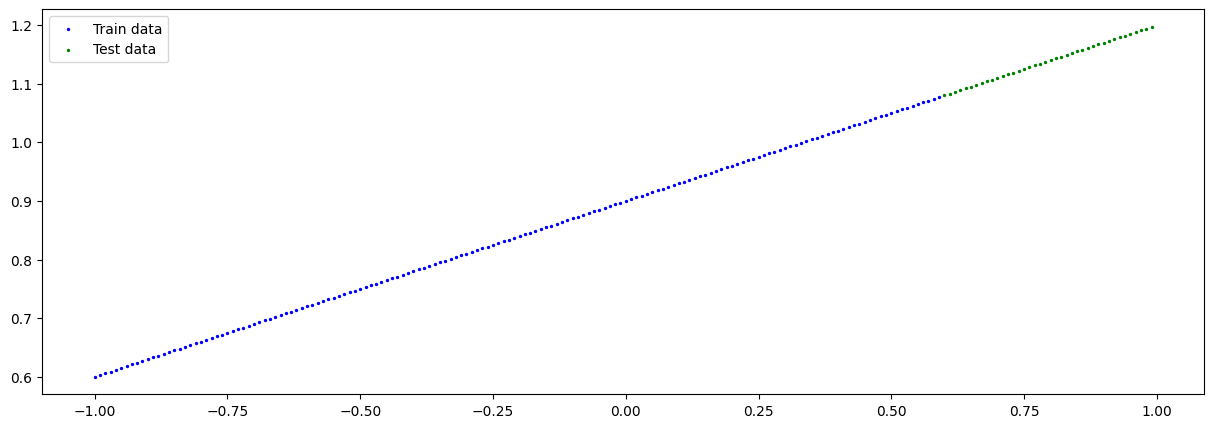

In [88]:
plot_data()

In [173]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [185]:
torch.manual_seed(42)

model_3 = LinearRegressionModelV3()
model_3, model_3.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [186]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.01)

torch.manual_seed(42)
epoch_count = []
train_loss_val = []
test_loss_val = []
epochs=150

for epoch in range(epochs):
  model_3.train()
  y_preds = model_3(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_preds = model_3(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if (epoch % 10 == 0):
    epoch_count.append(epoch)
    train_loss_val.append(loss.detach().numpy())
    test_loss_val.append(test_loss.detach().numpy())
  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.22253790497779846 | Test loss: 0.30136603116989136
Epoch: 10 | Train loss: 0.14970926940441132 | Test loss: 0.3170817494392395
Epoch: 20 | Train loss: 0.10880176723003387 | Test loss: 0.2934221029281616
Epoch: 30 | Train loss: 0.07168492674827576 | Test loss: 0.18765540421009064
Epoch: 40 | Train loss: 0.03148014470934868 | Test loss: 0.05923248454928398
Epoch: 50 | Train loss: 0.007167644798755646 | Test loss: 0.027329275384545326
Epoch: 60 | Train loss: 0.006880882196128368 | Test loss: 0.010783439502120018
Epoch: 70 | Train loss: 0.003780938684940338 | Test loss: 0.005453458521515131
Epoch: 80 | Train loss: 0.0016219265526160598 | Test loss: 0.0007502406951971352
Epoch: 90 | Train loss: 0.0021471299696713686 | Test loss: 0.006090166978538036
Epoch: 100 | Train loss: 0.0011761825298890471 | Test loss: 8.374154276680201e-05
Epoch: 110 | Train loss: 0.0017974093789234757 | Test loss: 0.0030982433818280697
Epoch: 120 | Train loss: 0.002114073606207967 | Test los

In [187]:
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3011]])),
             ('linear_layer.bias', tensor([0.8988]))])

In [188]:
model_linear.eval()
with torch.inference_mode():
  preds = model_3(X_test)
preds[:5]

tensor([[1.0795],
        [1.0825],
        [1.0855],
        [1.0885],
        [1.0915]])

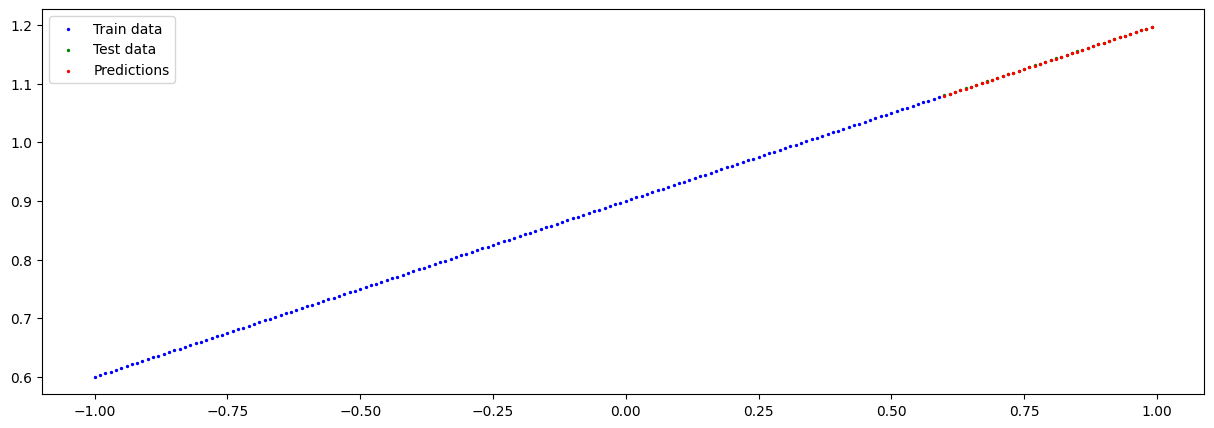

In [189]:
plot_data(predictions=preds)

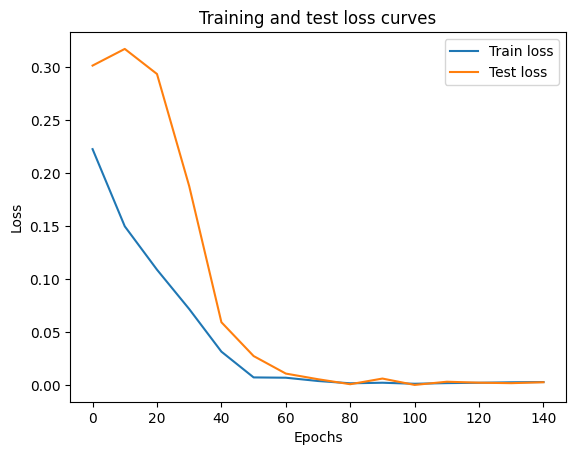

In [190]:
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
plt.show()